# L2Cache performance - Figure 3 & Extended Data Figure 4

This notebook creates the plots presented in Figure 3 & Extended Data Figure 4 of the CAVE paper.

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns

## Define relevant paths and create directories


In [2]:
data_dir = f"{os.path.realpath('')}/../data"
figure_dir = f"{os.path.realpath('')}/../figures/figure_3_extfigure_4/"

if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)

In [3]:
cmap = {
    "microns": [.9, .3, .3],
    "flywire": [.2, .8, .8],
}

## Load data

In [4]:
morpho_df = pd.read_csv(f"{data_dir}/morphological_features_L2_performances.csv")
skeleton_df = pd.read_csv(f"{data_dir}/skeletons_L2_performances.csv")

## Data overview

### Morphological features

In [5]:
morpho_df["dataset"].value_counts()

dataset
flywire    101554
microns      1357
Name: count, dtype: int64

### Skeletons

In [6]:
skeleton_df["dataset"].value_counts()

dataset
flywire    78030
microns     1357
Name: count, dtype: int64

## Plotting

### Morphological features

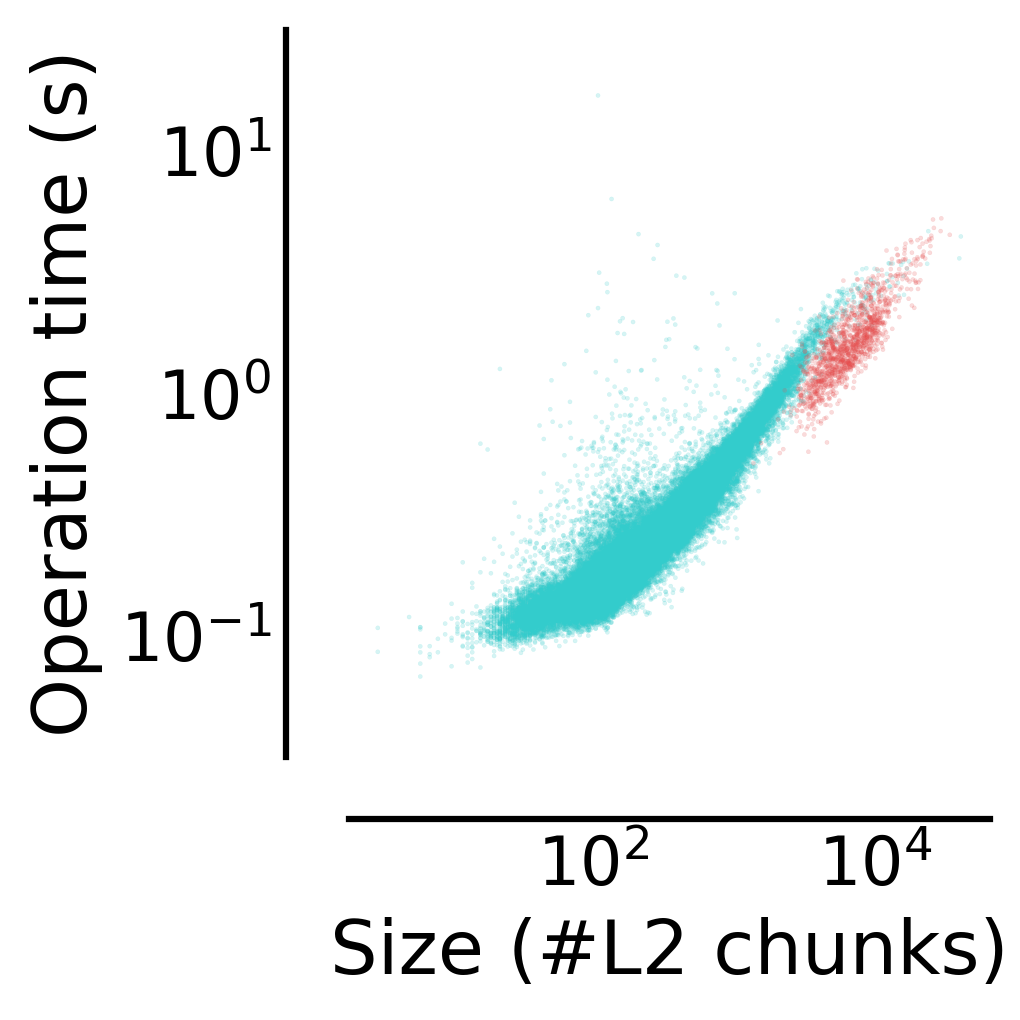

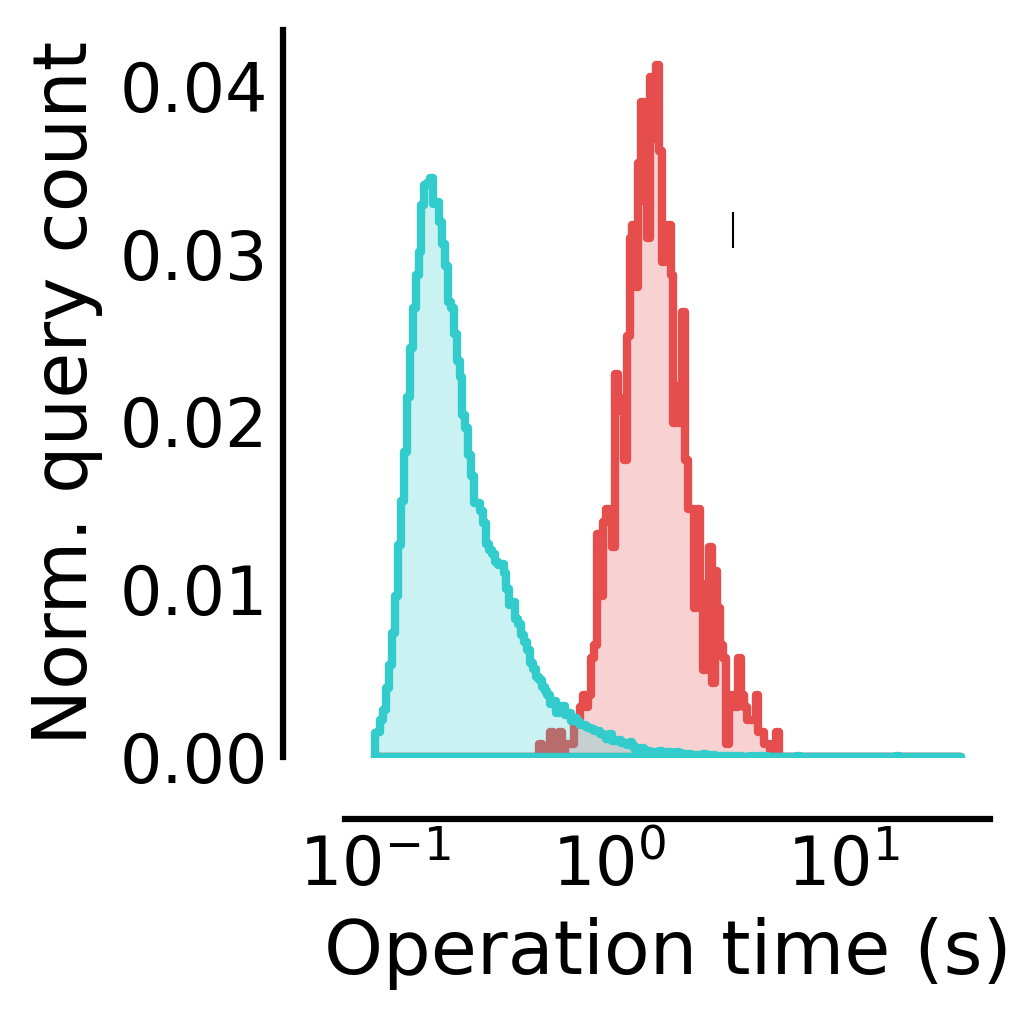

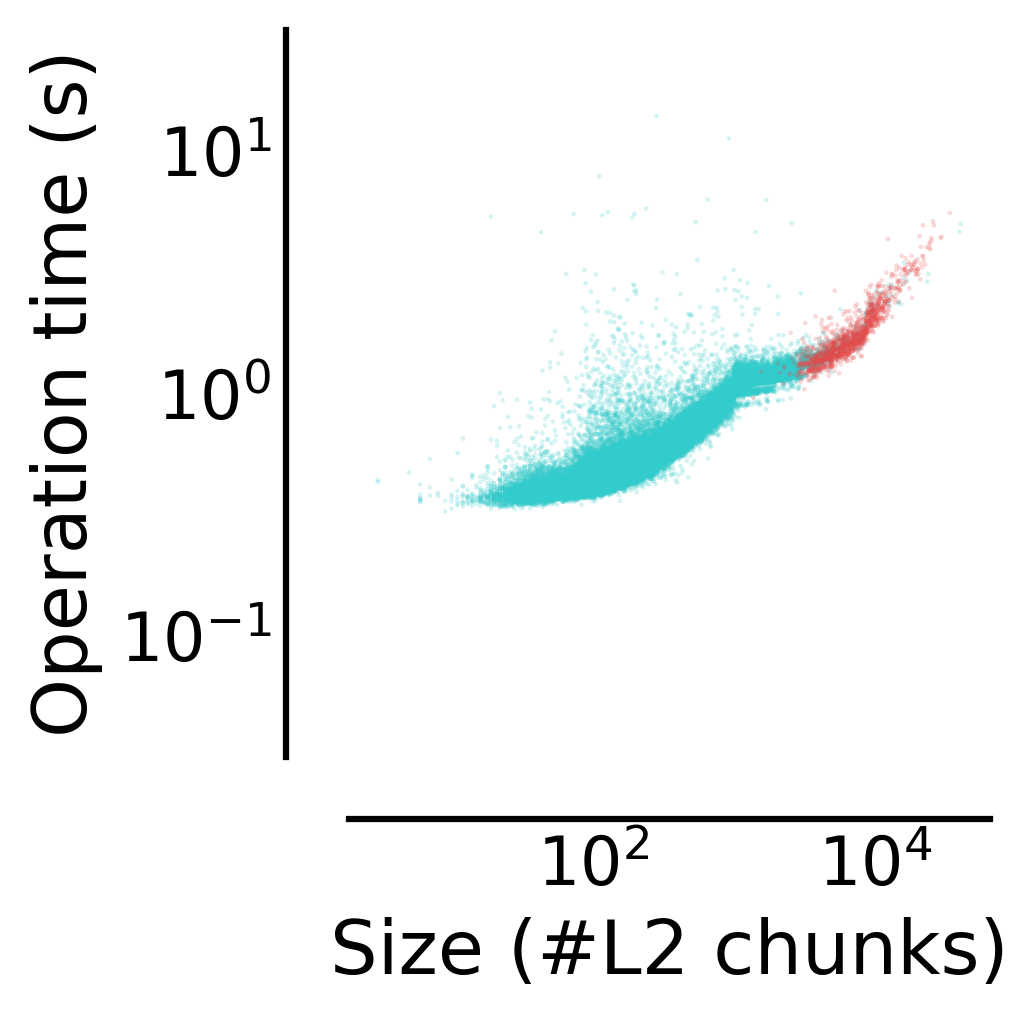

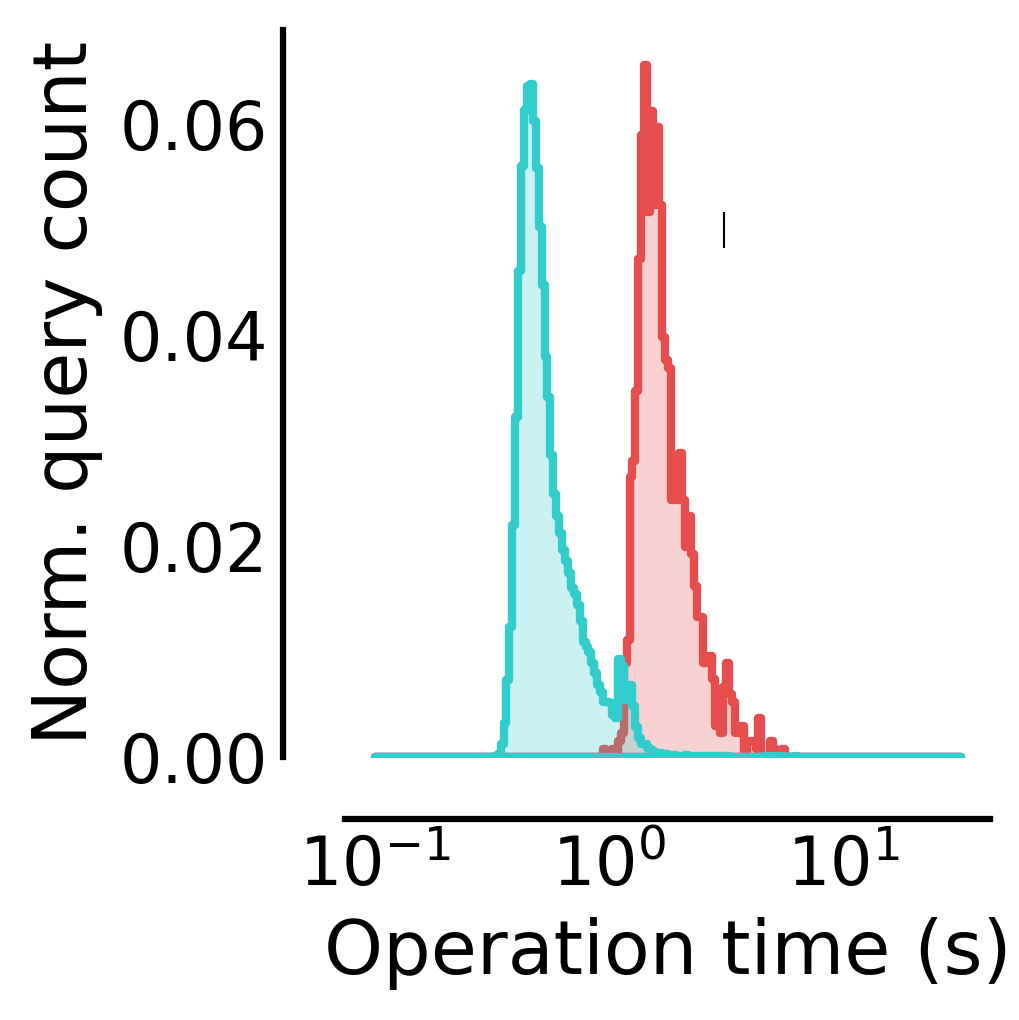

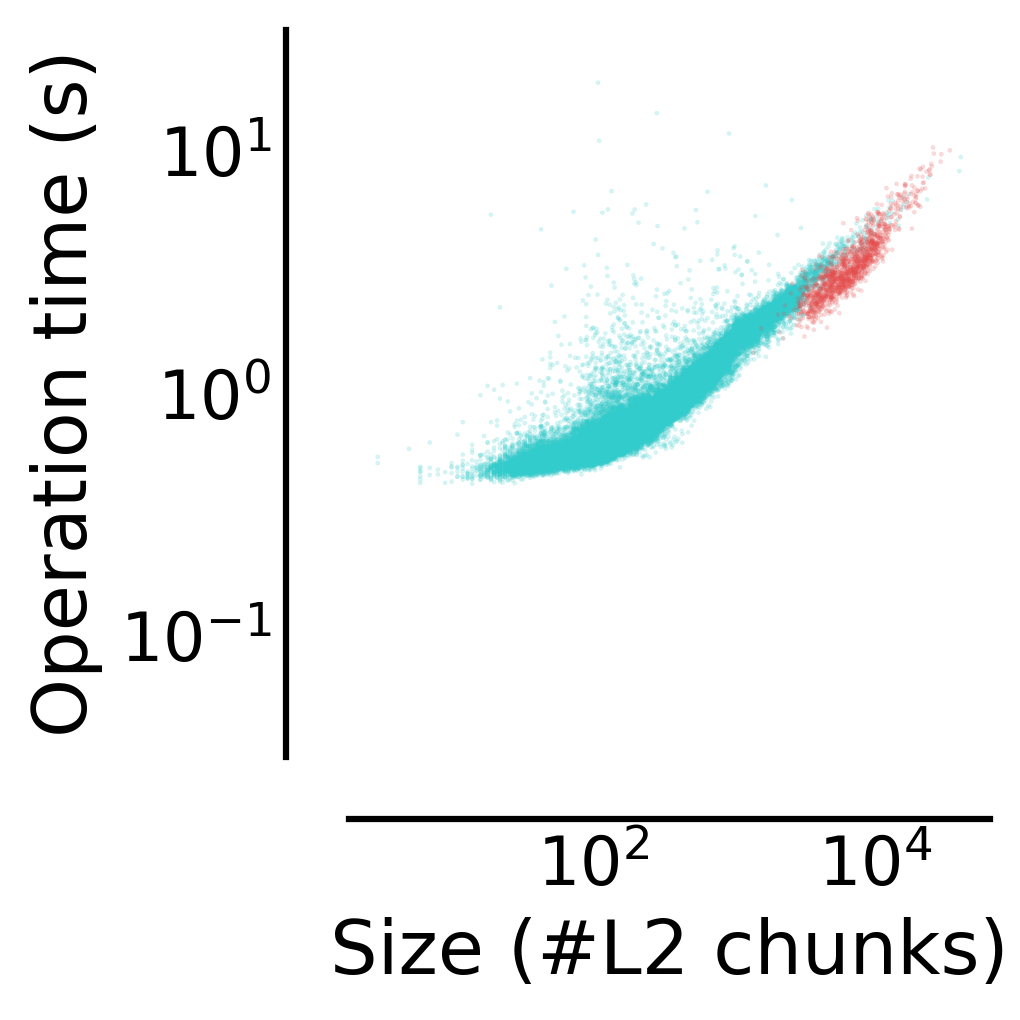

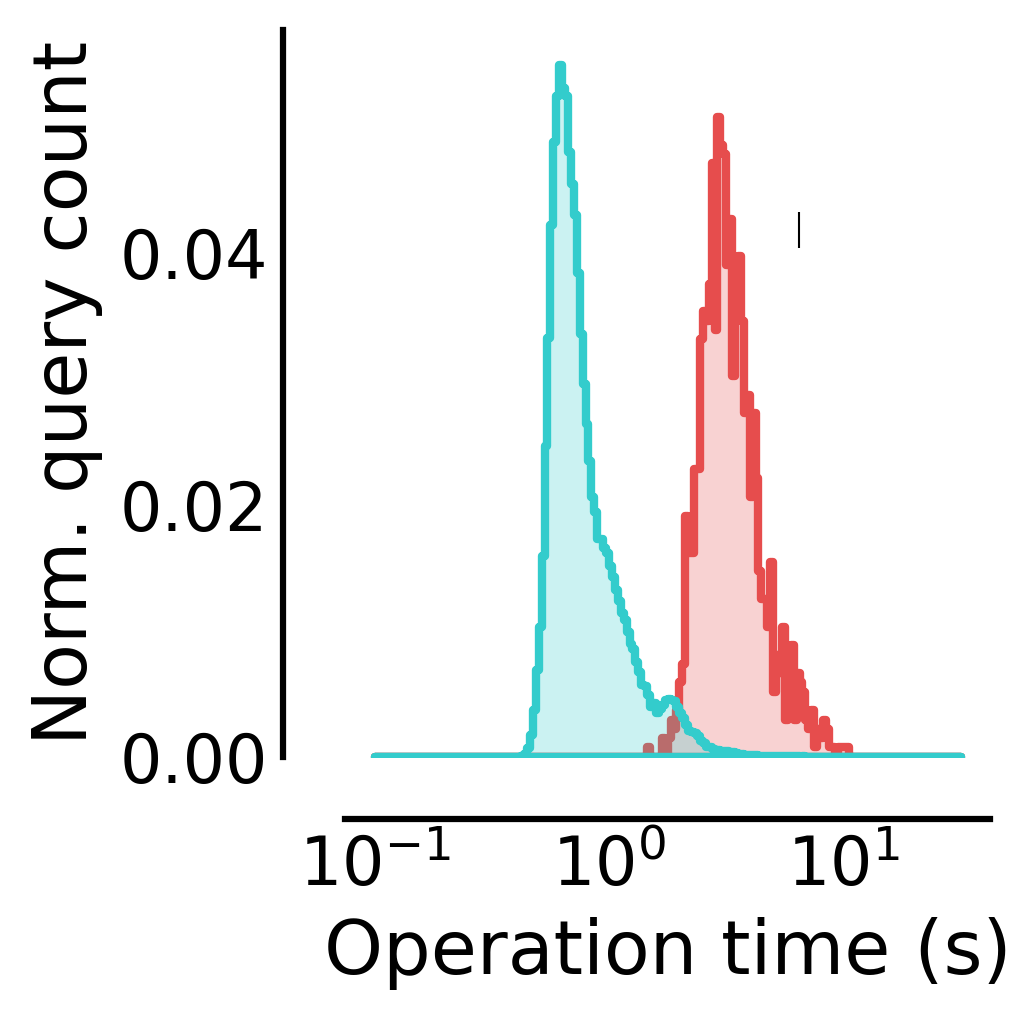

In [7]:
for col in morpho_df.columns:
    if not "time" in col: 
        continue
        
    # SCATTER
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5), facecolor="white", dpi=300)
    plt.tick_params(length=0, width=0, labelsize=16, which="major")
    plt.tick_params(length=0, width=0, labelsize=16, which="minor")

    for ax in fig.axes:
        ax.spines["bottom"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.spines["right"].set_linewidth(0)
        ax.spines["top"].set_linewidth(0)

    sns.scatterplot(data=morpho_df, y=col, x="size_l2", hue="dataset", legend=False, s=1, alpha=.2,
                    palette=cmap, edgecolor=None)
    plt.xscale("log")
    plt.yscale("log")


    plt.xlabel("Size (#L2 chunks)", fontsize=18)
    plt.ylabel("Operation time (s)", fontsize=18)
    
    plt.ylim(10**(-1.5), 10**1.5)

    sns.despine(offset=15, trim=False)
    plt.tight_layout()

    plt.savefig(f"{figure_dir}/morpho_scatter_{col}.png", dpi=300)
    plt.savefig(f"{figure_dir}/morpho_scatter_{col}.pdf", dpi=300)
    plt.show()
    
    # HIST
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5), facecolor="white", dpi=300)
    plt.tick_params(length=0, width=0, labelsize=16, which="major")
    plt.tick_params(length=0, width=0, labelsize=16, which="minor")

    for ax in fig.axes:
        ax.spines["bottom"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.spines["right"].set_linewidth(0)
        ax.spines["top"].set_linewidth(0)

    sns.histplot(data=morpho_df, x=col, cumulative=False, element="step", hue="dataset",
                 fill=True, bins=np.logspace(-1, 1.5, 201), color="k", stat="probability",
                 common_norm=False, legend=False, lw=2, palette=cmap)
    plt.xscale("log")

    plt.ylabel("Norm. query count", fontsize=18)
    plt.xlabel("Operation time (s)", fontsize=18)
    
    ymax = plt.ylim()[1]
    plt.vlines(float(morpho_df[morpho_df["root_id"] == 864691135490941927][col].iloc[0]), ymax * .7, ymax * .75, color="k", lw=.5)

    sns.despine(offset=15, trim=False)
    plt.tight_layout()

    plt.savefig(f"{figure_dir}/morpho_hist_{col}.png", dpi=300)
    plt.savefig(f"{figure_dir}/morpho_hist_{col}.pdf", dpi=300)
    plt.show()

### Skeletons

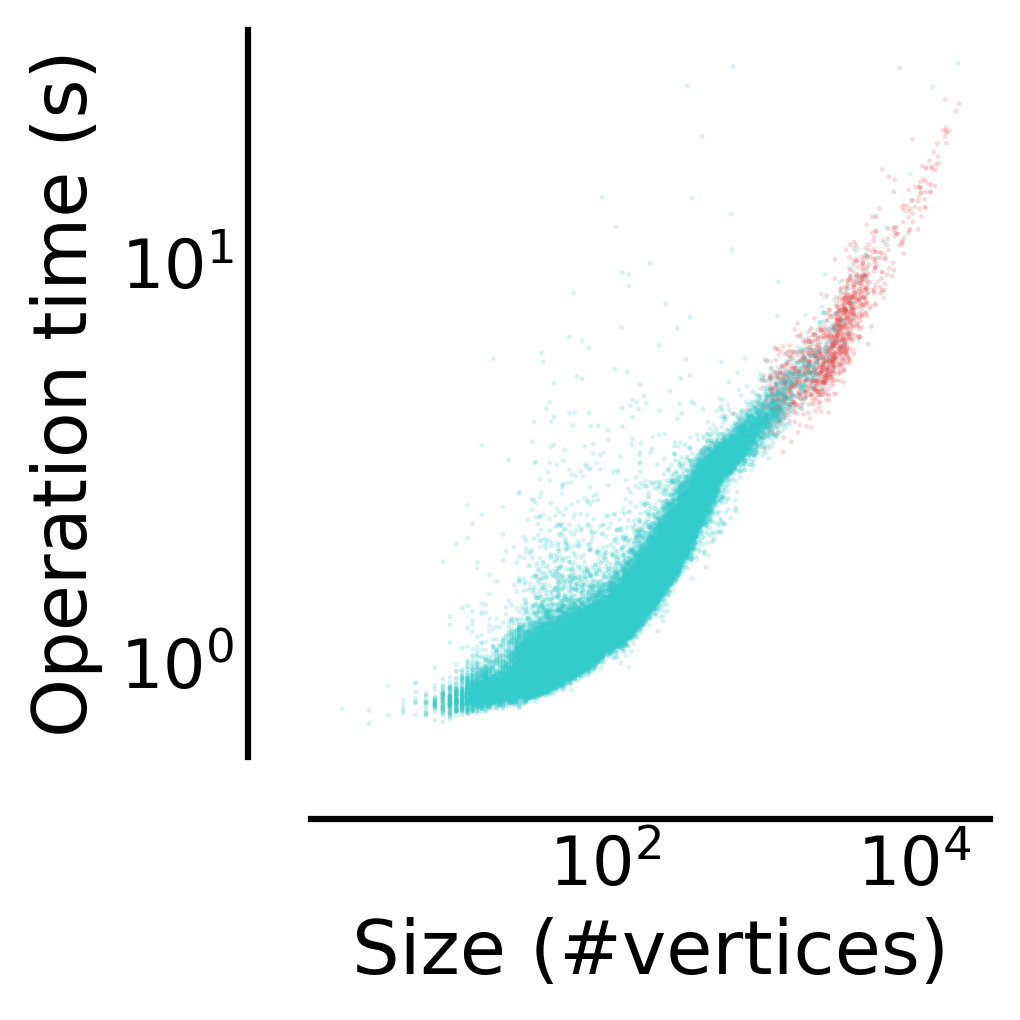

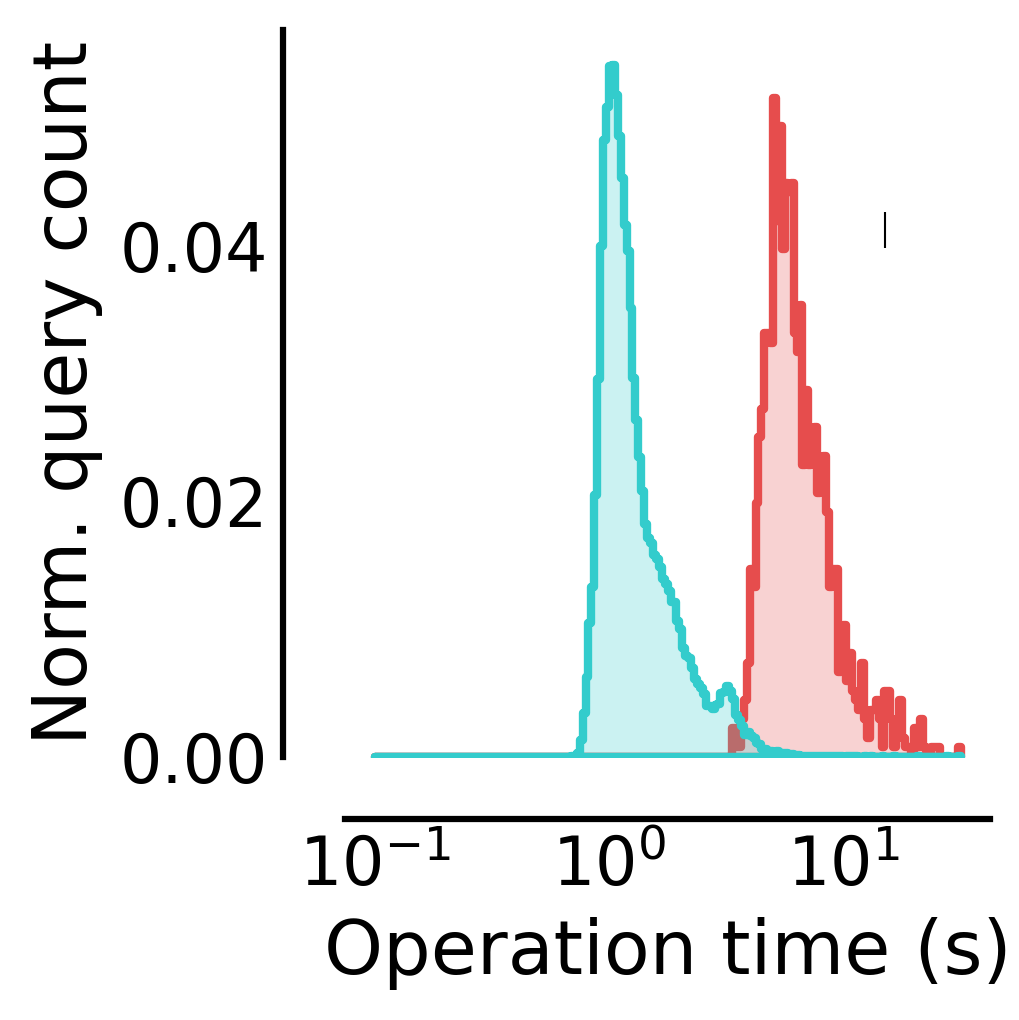

In [8]:
for col in skeleton_df.columns:
    if not "time" in col: 
        continue
        
    # SCATTER
    
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5), facecolor="white", dpi=300)
    plt.tick_params(length=0, width=0, labelsize=16, which="major")
    plt.tick_params(length=0, width=0, labelsize=16, which="minor")

    for ax in fig.axes:
        ax.spines["bottom"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.spines["right"].set_linewidth(0)
        ax.spines["top"].set_linewidth(0)

    sns.scatterplot(data=skeleton_df, y=col, x="n_vertices", hue="dataset", legend=False, s=1, alpha=.2,
                    palette=cmap, edgecolor=None)
    plt.xscale("log")
    plt.yscale("log")


    plt.xlabel("Size (#vertices)", fontsize=18)
    plt.ylabel("Operation time (s)", fontsize=18)

    sns.despine(offset=15, trim=False)
    plt.tight_layout()

    plt.savefig(f"{figure_dir}/skeleton_scatter_{col}.png", dpi=300)
    plt.savefig(f"{figure_dir}/skeleton_scatter_{col}.pdf", dpi=300)
    plt.show()
    
    # HIST

    fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5), facecolor="white", dpi=300)
    plt.tick_params(length=0, width=0, labelsize=16, which="major")
    plt.tick_params(length=0, width=0, labelsize=16, which="minor")

    for ax in fig.axes:
        ax.spines["bottom"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.spines["right"].set_linewidth(0)
        ax.spines["top"].set_linewidth(0)

    sns.histplot(data=skeleton_df, x="time", cumulative=False, element="step", hue="dataset",
                 fill=True, bins=np.logspace(-1, 1.5, 201), color="k", stat="probability",
                 common_norm=False, legend=False, lw=2, palette=cmap)
    plt.xscale("log")

    plt.ylabel("Norm. query count", fontsize=18)
    plt.xlabel("Operation time (s)", fontsize=18)

    ymax = plt.ylim()[1]
    plt.vlines(float(skeleton_df[skeleton_df["root_id"] == 864691135490941927][col].iloc[0]),
               ymax * .7, ymax * .75, color="k", lw=.5)

    sns.despine(offset=15, trim=False)
    plt.tight_layout()

    plt.savefig(f"{figure_dir}/skeleton_hist_{col}.png", dpi=300)
    plt.savefig(f"{figure_dir}/skeleton_hist_{col}.pdf", dpi=300)
    plt.show()